In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# Load the dataset
df = pd.read_csv('electricity_cost_dataset.csv')

# About the dataset
print(df.info())
print(df.describe())

# Skewness for detecting distribution asymmetry
print('\nSkewness:')
print(df.skew(numeric_only=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   site area             10000 non-null  int64  
 1   structure type        10000 non-null  object 
 2   water consumption     10000 non-null  float64
 3   recycling rate        10000 non-null  int64  
 4   utilisation rate      10000 non-null  int64  
 5   air qality index      10000 non-null  int64  
 6   issue reolution time  10000 non-null  int64  
 7   resident count        10000 non-null  int64  
 8   electricity cost      10000 non-null  float64
dtypes: float64(2), int64(6), object(1)
memory usage: 703.3+ KB
None
          site area  water consumption  recycling rate  utilisation rate  \
count  10000.000000       10000.000000    10000.000000      10000.000000   
mean    2757.775100        3494.057100       49.598000         64.842200   
std     1293.059959        2076.181

In [ ]:
df = df.rename(columns={
    "air qality index": "air quality index",
    "issue reolution time": "issue resolution time"
})

In [ ]:
print("numpy", np.__version__)
print("pandas", pd.__version__)
print("sklearn", sklearn.__version__)

numpy 2.0.2
pandas 2.2.2
sklearn 1.6.1


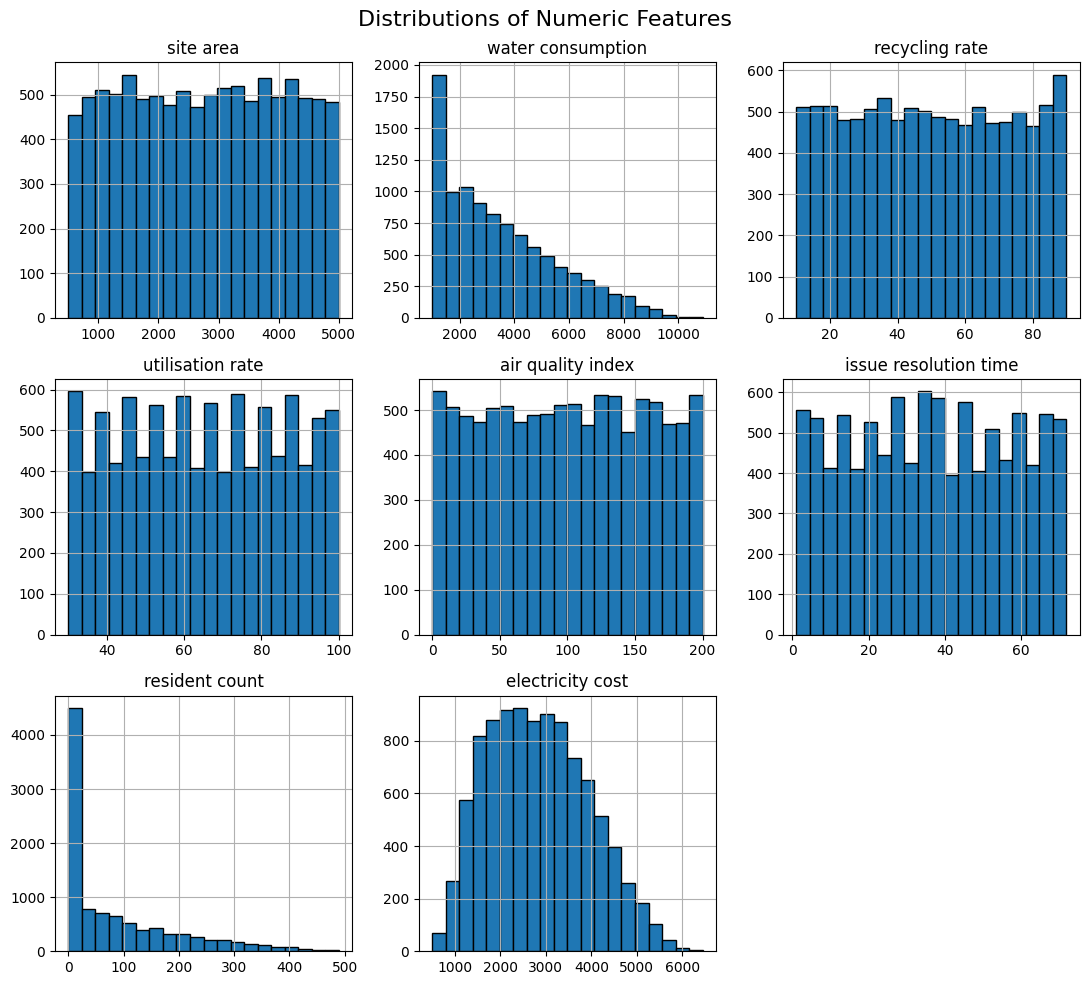



structure type
Residential    3939
Commercial     3005
Mixed-use      2052
Industrial     1004
Name: count, dtype: int64


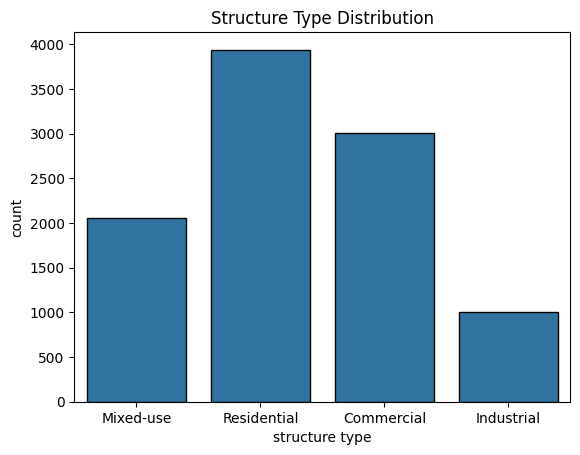

In [ ]:
# ------------ 1. EXPLORATORY DATA ANALYSIS (EDA) ------------ #

# Visualizing distributions of features
df.hist(figsize=(11, 10), bins=20, edgecolor='black')
plt.suptitle('Distributions of Numeric Features', fontsize=16)
plt.tight_layout()
plt.show()

print('\n')
print(df['structure type'].value_counts())
sns.countplot(x='structure type', data=df, edgecolor='black')
plt.title('Structure Type Distribution')
plt.show()

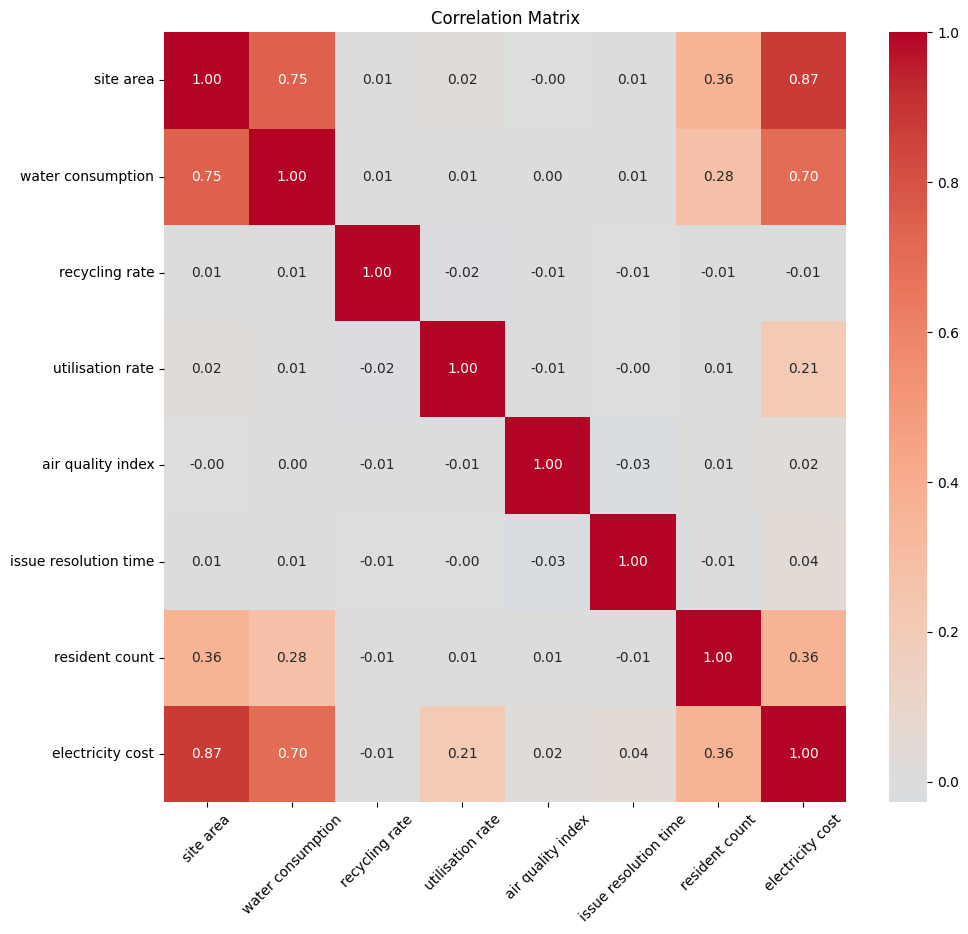

In [ ]:
# Correlation matrix
corr = df.corr(numeric_only=True)

# Visualizing correlation matrix as a heatmap
plt.figure(figsize=(11, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', center=0)
plt.title('Correlation Matrix')
plt.xticks(rotation=45)
plt.show()

Missing values per column:
site area                0
structure type           0
water consumption        0
recycling rate           0
utilisation rate         0
air quality index        0
issue resolution time    0
resident count           0
electricity cost         0
dtype: int64


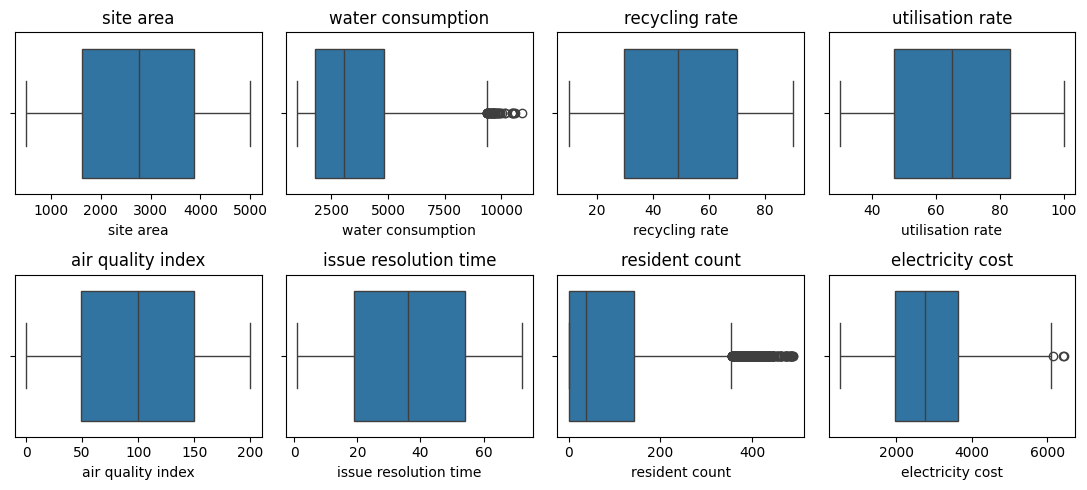

In [ ]:
# Missing values count
print('Missing values per column:')
print(df.isnull().sum())

# Boxplots to visualize skew/outliers in numeric features
numeric_cols = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(11, 5))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, (len(numeric_cols)+1)//2, i)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

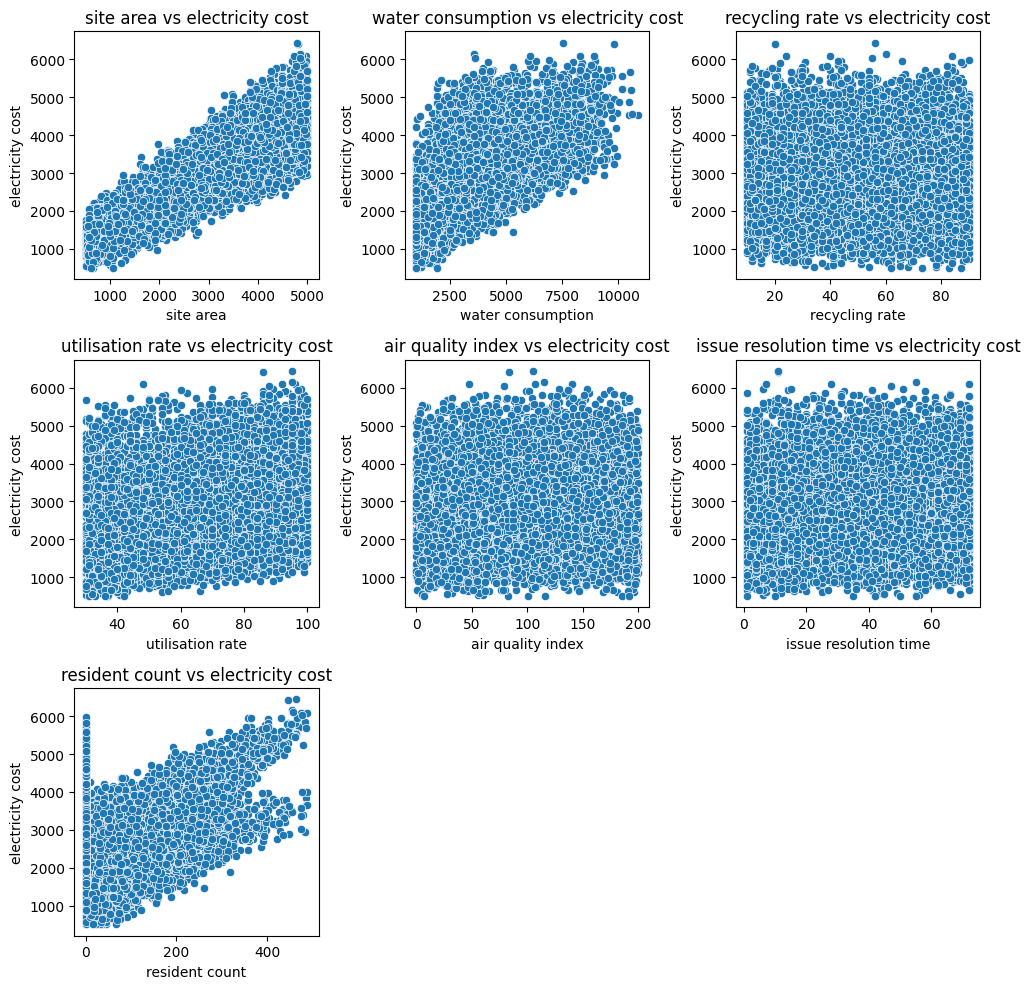

In [ ]:
# Understanding Feature–Target Relationships
target = 'electricity cost'
features = [col for col in numeric_cols if col != target]

plt.figure(figsize=(10, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(x=df[feature], y=df[target])
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.title(f'{feature} vs {target}')
plt.tight_layout()
plt.show()

In [ ]:
# ------------ 2. DATA PREPROCESSING ------------ #

# Missing values count
print('Missing values per column:')
print(df.isnull().sum())

Missing values per column:
site area                0
structure type           0
water consumption        0
recycling rate           0
utilisation rate         0
air quality index        0
issue resolution time    0
resident count           0
electricity cost         0
dtype: int64


In [ ]:
# Splitting dataset into training and testing data
from sklearn.model_selection import train_test_split

# Features and target
X = df.drop('electricity cost', axis=1)
y = df['electricity cost']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Selecting categorical column(s)
categorical_cols = ["structure type"]

# Initializing encoder
encoder = OneHotEncoder(drop="first", sparse_output=False, dtype=int)

# Fit on training data and transform both train & test
X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
X_test_encoded = encoder.transform(X_test[categorical_cols])

# Converting back to DataFrame with proper column names
encoded_cols = encoder.get_feature_names_out(categorical_cols)

X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoded_cols, index=X_train.index)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoded_cols, index=X_test.index)

# Dropping original categorical column and concatenate encoded features
X_train_final = pd.concat([X_train.drop(columns=categorical_cols), X_train_encoded_df], axis=1)
X_test_final = pd.concat([X_test.drop(columns=categorical_cols), X_test_encoded_df], axis=1)

In [ ]:
# Standardizing numerical data
from sklearn.preprocessing import StandardScaler

# Selecting numeric columns
numeric_cols = [col for col in X_train_final.select_dtypes(include=[np.number]).columns if not col.startswith('structure type_')]

scaler = StandardScaler()
X_train_final[numeric_cols] = scaler.fit_transform(X_train_final[numeric_cols])
X_test_final[numeric_cols] = scaler.transform(X_test_final[numeric_cols])

X_train_final.sample(10)

,site area,water consumption,recycling rate,utilisation rate,air quality index,issue resolution time,resident count,structure type_Industrial,structure type_Mixed-use,structure type_Residential
2005,1.106422,1.377711,1.342885,1.143066,-0.924306,-0.447114,2.862953,0,0,1
5222,-0.491542,-0.026908,-1.302143,0.014784,0.729509,1.491566,-0.787332,0,0,0
7650,-0.323376,-0.578380,1.257562,0.161951,-0.975987,0.619160,-0.555715,0,0,1
4886,-0.182334,-0.269498,1.044253,-0.377662,-0.924306,-0.544048,-0.787332,1,0,0
5419,-0.890645,-0.868527,1.300224,0.848731,-0.562534,-1.125653,-0.203657,0,0,1
889,0.342313,-0.955475,-0.107614,-0.132383,1.384144,0.667627,-0.787332,0,0,0
5775,0.725917,1.697161,1.342885,-0.868219,-0.665897,0.425292,1.936484,0,1,0
6407,1.465228,1.949359,-0.150276,1.486456,-1.527259,-1.271054,1.501044,0,1,0
2739,-0.056015,0.064363,0.916268,1.044954,-0.958760,-1.222587,-0.787332,0,0,0
8121,0.849911,-0.682621,0.617636,1.731734,-0.907078,-0.640982,-0.787332,0,0,0


In [ ]:
# ------------ 3. MODEL BUILDING (REGRESSION) ------------ #

# Using RandomForest to train the data
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model = RandomForestRegressor()

model.fit(X_train_final, y_train)
y_pred = model.predict(X_test_final)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest:\nRMSE={rmse}\nMAE={mae}\nR2={r2}")

Random Forest:
RMSE=219.50956508202552
MAE=174.47303999999997
R2=0.9613749766226242


In [ ]:
# Hyperparameter tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [5, 10, 15, 20, None],
    'max_samples': [0.5, 0.75, 1.0]
}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=10, verbose=2, n_jobs=-1)
grid_search.fit(X_train_final, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Fitting 10 folds for each of 60 candidates, totalling 600 fits
Best parameters: {'max_depth': None, 'max_samples': 0.5, 'n_estimators': 200}
Best score: 0.9598311613960752


In [19]:
import pickle
best_rf = grid_search.best_estimator_

with open('Electricity_cost_prediction.pkl', 'wb') as file:
    pickle.dump(best_rf, file)

In [20]:
import pickle
with open('cost_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)